In [1]:
import pandas as pd
#Visualize Data sets
df_meal = pd.read_csv('meal_info.csv') 
print(df_meal.head())

df_center = pd.read_csv('fulfilment_center_info.csv') 
#print(df_center.head())

df_food = pd.read_csv('train.csv') 
#print(df_food.head())

#first merge all the three dataframes into a single dataframe.
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')
print(df)


   meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian
             id  week  center_id  meal_id  checkout_price  base_price  \
0       1379560     1         55     1885          136.83      152.29   
1       1018704     2         55     1885          135.83      152.29   
2       1196273     3         55     1885          132.92      133.92   
3       1116527     4         55     1885          135.86      134.86   
4       1343872     5         55     1885          146.50      147.50   
...         ...   ...        ...      ...             ...         ...   
456543  1437396   141         61     2104          583.03      630.53   
456544  1060716   142         61     2104          581.03      582.03   
456545  1029231   143         61     2104          583.03      581.03   
456546  1141147   144         61     2104          582.03      581.03   
456547  1443704  

In [2]:
#First, we want to find the most popular food item that customers have bought from the company.
#Pandas pivot_table function to find the total number of orders for each category of the food item
import numpy as np
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
print(table)

              num_orders
category                
Beverages       40480525
Biryani           631848
Desert           1940754
Extras           3984979
Fish              871959
Other Snacks     4766293
Pasta            1637744
Pizza            7383720
Rice Bowl       20874063
Salad           10944336
Sandwich        17636782
Seafood          2715714
Soup             1039646
Starters         4649122


C:\Users\Dell\AppData\Local\Temp\ipykernel_9980\933454737.py:4: FutureWarning: The provided callable <function sum at 0x000001950A6F4FE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)


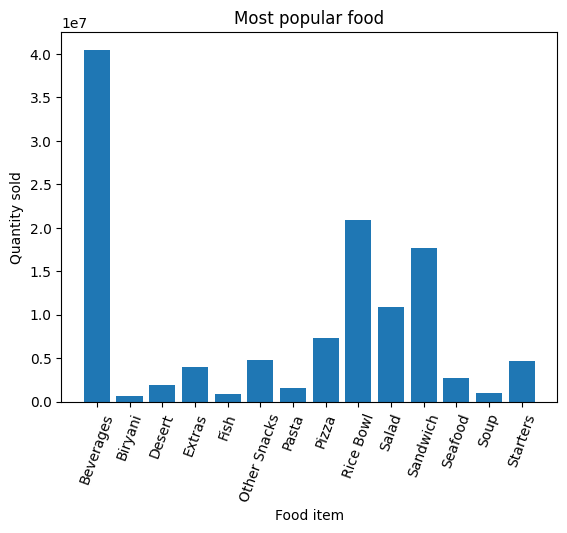

In [6]:
#visualize this using a bar graph.
#bar graph
from matplotlib import pyplot as plt
plt.bar(table.index,table['num_orders'])
#xticks 
plt.xticks(rotation=70) 
#x-axis labels 
plt.xlabel('Food item') 
#y-axis labels 
plt.ylabel('Quantity sold') 
#plot title 
plt.title('Most popular food') 
#save plot 
plt.savefig('Popular_Food_new.jpg',dpi=300,bbox_inches='tight') 
#display 
plt.show()

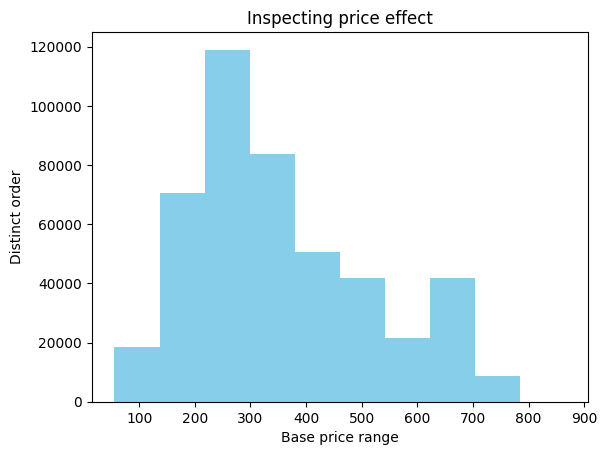

In [7]:
#plotting histogram 
plt.hist(df['base_price'],color='skyblue') 
#x and y-axis labels 
plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 
#plot title 
plt.title('Inspecting price effect') 
#save and display the plot 
#plt.savefig('D:\\Resolve6_Training\\DS_ML\\Matplot lib Data\\hist.png',dpi=300,bbox_inches='tight') 
plt.show()

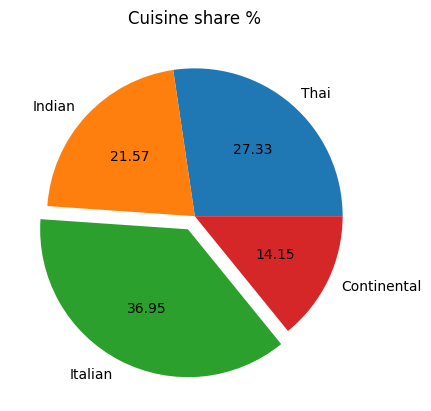

In [8]:
#dictionary for cuisine and its total orders
d_cuisine = {}

#total number of order
total = df['num_orders'].sum()

#find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):
    c = df['cuisine'].unique()[i]
    c_order = df[df['cuisine']==c]['num_orders'].sum()#num of orders for the cuisine
    d_cuisine[c] = c_order/total

#pie plot 
plt.pie([x*100 for x in d_cuisine.values()],labels=[x for x in d_cuisine.keys()],autopct='%0.2f',explode=[0,0,0.1,0]) 

#label the plot 
plt.title('Cuisine share %') 
plt.savefig('pie_plot.png',dpi=300,bbox_inches='tight') 
plt.show()